In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime, time

# Cleaning Data

In [342]:
users = pd.read_csv(r'C:\Users\sh9wn\Desktop\Springboard Mini Projects\relax_challenge\relax_challenge\takehome_users.csv', 
           encoding='iso-8859-1')
users.head()
#read in df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [343]:
engage = pd.read_csv(r'C:\Users\sh9wn\Desktop\Springboard Mini Projects\relax_challenge\relax_challenge\takehome_user_engagement.csv', 
           encoding='iso-8859-1')
engage.head()
#read in df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [351]:
engage.time_stamp = pd.to_datetime(engage.time_stamp)
engage.index=engage.time_stamp
engage.drop(labels='time_stamp',axis=1,inplace=True)

In [352]:
date_df= engage.groupby([pd.Grouper(freq='W'),'user_id']).sum()

In [353]:
adopt_df = date_df[date_df.visited>=3].unstack(level=1).melt()
adopted_users = pd.Series(adopt_df.user_id.unique(),index=range(adopt_df.user_id.unique().shape[0]))
users['adopted'] = users.object_id.isin(adopted_users)
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False
...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,False


# Exploratory Analysis

Text(0, 0.5, 'Number of signups')

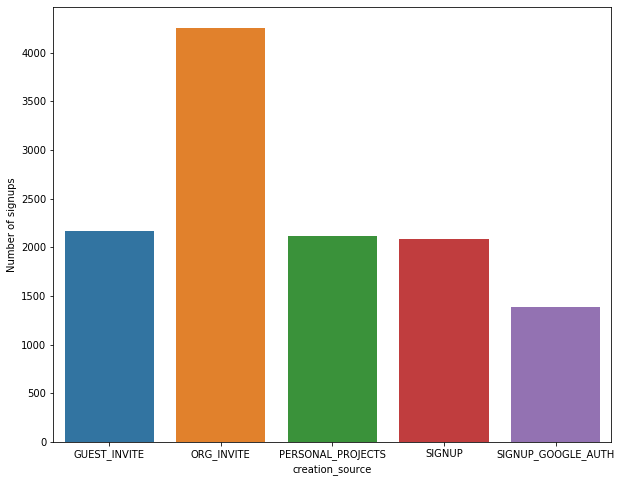

In [354]:
plt.figure(figsize=(10,8))
creation = users.groupby('creation_source')[['object_id']].count().reset_index()
sns.barplot(x='creation_source', y='object_id', data= creation)
plt.ylabel("Number of signups")
#most accounts are from an organization invite

In [355]:
users.adopted.value_counts()/(users.adopted.count())
#only 12% of users are adopted

False    0.879583
True     0.120417
Name: adopted, dtype: float64

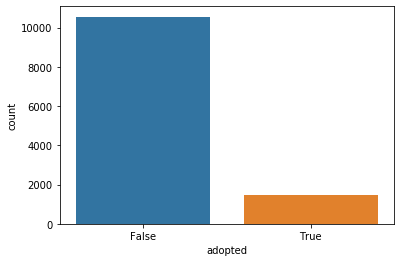

In [357]:
sns.countplot(x='adopted', data=users)
#the majority of users are not adopted users


       invited_by_user_id
False                6417
True                 5583


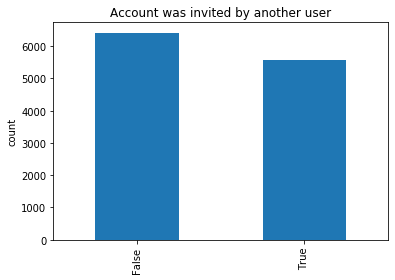

In [358]:
n = np.isnan(users.invited_by_user_id).value_counts()
n = n.to_frame()
n.plot(kind='bar', legend=False)
plt.ylabel('count')
plt.title('Account was invited by another user')
print(n)
#most users not invited by other user

# Predictions

In [359]:
users.invited_by_user_id=  users.invited_by_user_id.replace({np.nan : 0})
users.tail()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,False
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,0.0,False
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,False
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,0.0,False
11999,12000,2014-01-26 08:57:12,Lima Thaís,ThaisMeloLima@hotmail.com,SIGNUP,1.390727e+09,0,1,0,0.0,False


In [360]:
users.creation_source = users.creation_source.astype('category').cat.codes
users.adopted =users.adopted.astype('category').cat.codes
users.dropna()
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,1.358850e+09,0,0,193,5240.0,0


In [361]:
X = users.drop(columns=['object_id','name','email', 'last_session_creation_time'])

In [362]:
X.creation_time = pd.to_datetime(X.creation_time)

In [363]:
X['month_created']= X.creation_time.dt.month
X['year_created']=X.creation_time.dt.year
X['day_created']=X.creation_time.dt.day

In [364]:
Y=X.adopted
X=X.drop(columns=['adopted', 'creation_time'])

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=99)

In [369]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=99)
# use CV to tune number of trees
params = {'n_estimators': [200, 500, 750],
            'max_depth' : [ 200, 500, 750],
            'min_samples_split' : [2,4,6],
            'min_samples_leaf' : [2,4,6],
            'bootstrap' : [True]}
model = GridSearchCV(rfc, params)
model.fit(X_train, y_train)
print('Best parameters were', model.best_params_)


C:\Users\sh9wn\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best parameters were {'bootstrap': True, 'max_depth': 200, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [372]:
from sklearn.metrics import classification_report, accuracy_score
rfc = RandomForestClassifier(
    random_state=99, n_estimators=200)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Test accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test accuracy: 0.8747222222222222
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      3170
           1       0.18      0.01      0.03       430

    accuracy                           0.87      3600
   macro avg       0.53      0.50      0.48      3600
weighted avg       0.80      0.87      0.82      3600



In [373]:
fea = pd.Series(rfc.feature_importances_, index=X.columns)
fea = fea.sort_values(ascending=False)
print(fea)
#the most important feature was the ord_id, followed by the day created in a month and being invited by a user.

org_id                        0.336681
day_created                   0.229060
invited_by_user_id            0.174383
month_created                 0.129636
creation_source               0.052861
year_created                  0.035927
opted_in_to_mailing_list      0.023296
enabled_for_marketing_drip    0.018156
dtype: float64


# Summary

From our exploratory analysis, only about 12% of users turn out to be adopted users, which makes this category relatively rare. Most users are not adopted. Account creations from organizational invites are the highest of the creations sources with Google Authentication signups being the lowest. Also, the majority of accounts were not invited by another user. Moving on to predictions, our model performed poorly predicting active users, but performed well predicting non-active users. This might suggest that the variables I used for prediction are not correlated with active users. More user data would help to increase the accuracy. From the feature importances, mailing lists and marketing drips were the least important features for predicting active users, so this might suggest that marketing efforts have little effect on user retention.